In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.metrics import silhouette_score
import seaborn as sns

C:\Users\Ramesh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
enc = LabelEncoder()
df['species'] = enc.fit_transform(df['species'])

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [7]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
centers = kmeans.cluster_centers_
centers

array([[5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

In [9]:
y_kmeans = kmeans.fit_predict(df)

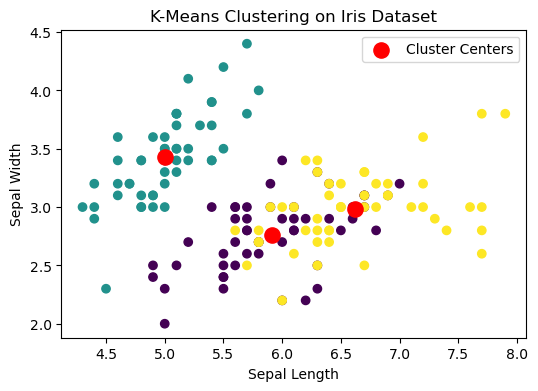

In [12]:
# Visualize the clusters
plt.figure(figsize=(6, 4))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=120, label='Cluster Centers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()


In [13]:
new_data_points = np.array([[5.1, 3.5],
                            [4.7, 3.2],
                            [1.6, 2.8]])
predicted_cluster = kmeans.fit_predict(new_data_points)

In [14]:
predicted_cluster

array([0, 2, 1])